# Cycle-GAN DEMO

## Basic Requirements
***
### .py files
- cycle_gan.py
- networks.py
- opt.py
- dataloader.py

### datasets folders in 'dataset/'
- "demo_img": images to be transfered 
- "demo_style": style to transfer

### Others
- numpy
- matplotlib
- PyTorch

## Checkpoints:
***
Networks and Loss will be saved every 10 epochs in the folder "saved_model_demo_img_demo_style"

In [1]:
import time
from cycle_gan import cycleGAN 
import opt
import dataloader
import torch
from torch.utils.data import DataLoader
import os
import numpy as np
import matplotlib.pyplot as plt

### present transfered results

loading the model from saved_models_comics_spider_paintings/latest_net_GenA.pth
loading the model from saved_models_comics_spider_paintings/latest_net_GenB.pth
loading the model from saved_models_comics_spider_paintings/latest_net_DisA.pth
loading the model from saved_models_comics_spider_paintings/latest_net_DisB.pth


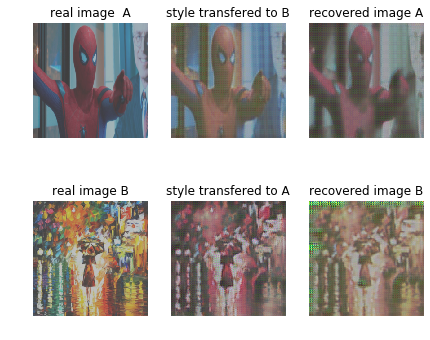

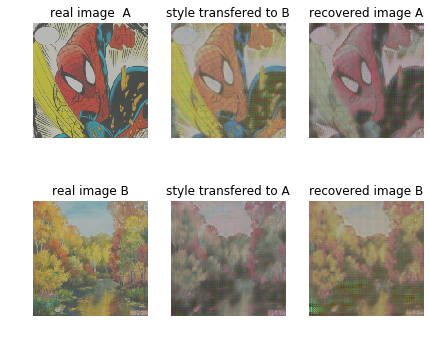

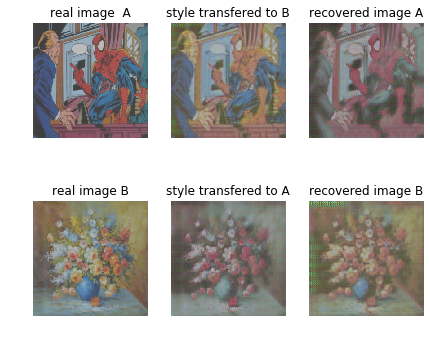

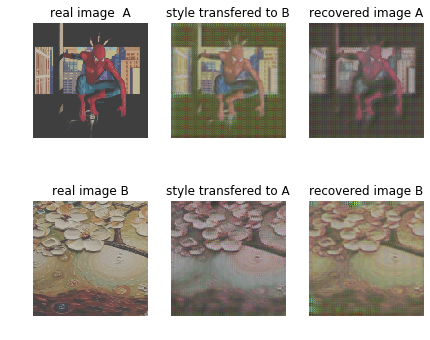

In [10]:
# test
model = cycleGAN(opt)     # create a model given opt.model and other options
epoch = 'latest' # from 10 to 200(interval is 10) or 'latest'
model.load_networks(epoch)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device) 
dataset_path = opt.dataroot
landscape_set = dataloader.GANTransDataset(dataset_path, mode = opt.set_A, image_size = opt.image_size)
style_set = dataloader.GANTransDataset(dataset_path, mode = opt.set_B,image_size = opt.image_size)
landscape_size = len(landscape_set)    # get the number of images in the dataset.
style_size = len(style_set)
batch_size = 1
dataset = dataloader.GANCombinedDataset(landscape_set, style_set)
dataset_loader = DataLoader(dataset, batch_size= 1, shuffle=False)
for i, (real_A, real_B) in enumerate(dataset_loader):
    with torch.no_grad():
        model.set_input(real_A.to(device), real_B.to(device))    
        model.test()           # run inference
        model.show_latest_img()
        plt.show()
    if i == 3: # show 4 pairs of results
        break

### present loss

In [ ]:
checkpoint = model.load_checkpoint(opt.epoch)
Loss = checkpoint['Loss']
Loss_G = torch.stack(Loss).numpy()
Loss_G = np.sum(Loss_G, axis = 1)

plt.figure()
plt.title('Evolution of Loss')
plt.plot(Loss_G)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()
plt.savefig('Evolution_of_loss.jpg')